In [1]:
import os, types
import pandas as pd

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle # creating a kaggle directory

In [8]:
ls

kaggle.json  sample_data/


In [4]:
pwd

'/content'

In [13]:
ls -l

total 8
-rw-r--r-- 1 root root   74 Jan  4 03:41 kaggle.json
drwxr-xr-x 1 root root 4096 Jan  2 19:14 sample_data/


In [6]:
!cp kaggle.json ~/.kaggle/  # copying json file to folder

In [12]:
!chmod 600 ~/.kaggle/kaggle.json  # changing the permissions to json

In [14]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

100% 9.64G/9.66G [01:34<00:00, 111MB/s]
100% 9.66G/9.66G [01:34<00:00, 109MB/s]


In [ ]:
!unzip diabetic-retinopathy-level-detection.zip

In [29]:
ls

'preprocessed dataset'/


In [28]:
pwd

'/content/preprocessed dataset'

In [30]:
cd preprocessed dataset

/content/preprocessed dataset/preprocessed dataset


In [22]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [49]:
train = train_gen.flow_from_directory('/content/preprocessed dataset/preprocessed dataset/training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/preprocessed dataset/preprocessed dataset/testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [43]:
train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [45]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [53]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(5,activation='softmax'))# here number 5 indicates the total number of classes we have

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [55]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
458/458 [==============================] - 517s 1s/step - loss: 0.9245 - accuracy: 0.6928 - val_loss: 0.8083 - val_accuracy: 0.7098
Epoch 2/10
458/458 [==============================] - 499s 1s/step - loss: 0.7606 - accuracy: 0.7264 - val_loss: 0.7721 - val_accuracy: 0.7262
Epoch 3/10
458/458 [==============================] - 491s 1s/step - loss: 0.7384 - accuracy: 0.7286 - val_loss: 0.7454 - val_accuracy: 0.7343
Epoch 4/10
458/458 [==============================] - 492s 1s/step - loss: 0.7230 - accuracy: 0.7365 - val_loss: 0.7498 - val_accuracy: 0.7520
Epoch 5/10
458/458 [==============================] - 488s 1s/step - loss: 0.7266 - accuracy: 0.7302 - val_loss: 0.7546 - val_accuracy: 0.7248
Epoch 6/10
458/458 [==============================] - 488s 1s/step - loss: 0.7068 - accuracy: 0.7392 - val_loss: 0.7247 - val_accuracy: 0.7425
Epoch 7/10
458/458 [==============================] - 485s 1s/step - loss: 0.6949 - accuracy: 0.7447 - val_loss: 0.7522 - val_accuracy: 0.7289

In [57]:
model.save('CNN_DR.h5')

In [58]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [60]:
ls

CNN_DR.h5  testing/  training/


In [61]:
img = image.load_img('/content/dr.jpg',target_size=(120,120))

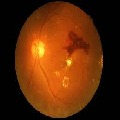

In [62]:
img

In [63]:
img = image.img_to_array(img)
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [64]:
img = np.expand_dims(img,axis=0)
img

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [65]:
np.argmax(model.predict(img))

1/1 [==============================] - 1s 598ms/step


1